# Introduction

### What is Healpy?
Healpy is the Python implementation of HEALPix (**H**ierarchical **E**qual **A**rea iso**L**atitude **Pix**elation).  HEALPix was created in 1997 to address difficult in plotting spherical data.  We are used to pixels in 2-dimensional images, where each pixel has a Cartesian coordinate, but how can we represent imformation on the surface of a sphere?  HEALPix pixelating spheres such that each pixel has equal surface area, and it presents results as a [Mollweide projection](https://en.wikipedia.org/wiki/Mollweide_projection).

### Installation
Healpy can be easily installed with pip:

`$ pip install healpy`

Then we can import what we will need:

In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache using fc-list. This may take a moment.
Matplotlib is building the font cache using fc-list. This may take a moment.


# Creating a Map

Before we create a map, we need to know the resolution, or number of pixels that will be in the map.  The parameter $N_{side}$, a power of 2, refers to the number of divisions along a base cell to reach the desired resolution.  The number of pixels in our map will then be $N_{pix} = 12 \cdot N_{side}^2$.  Healpy gives us the handy function `nside2npix` for this.

Healpy can make a Mollweide projection of a dataset with `mollview` given just an ndarray with length equivalent to a valid $N_{pix}$, and whether the array is in RING or NESTED format.  By default, Healpy will map the values from our array to a chromatic scale.  Here we can see the difference between the two formats:

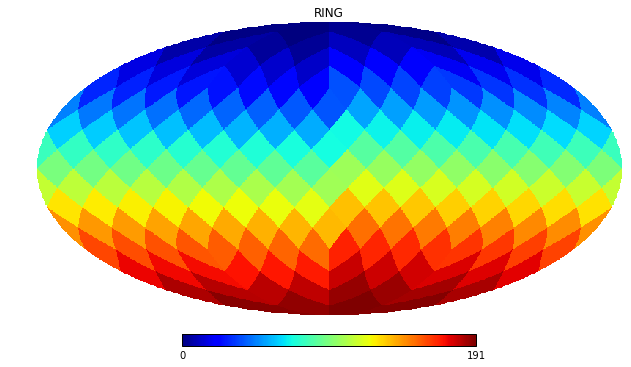

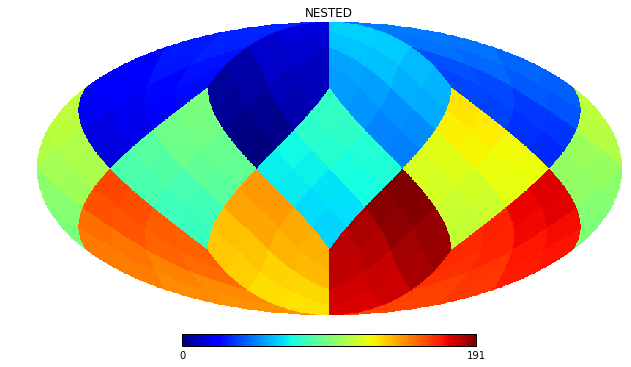

In [2]:
npix = hp.nside2npix(4)
L = np.arange(npix)

hp.mollview(L, title="RING")
plt.show()

hp.mollview(L, title="NESTED", nest=True)
plt.show()

From here on we will use the default, RING.

We can also see the result of increasing $N_{side}$:

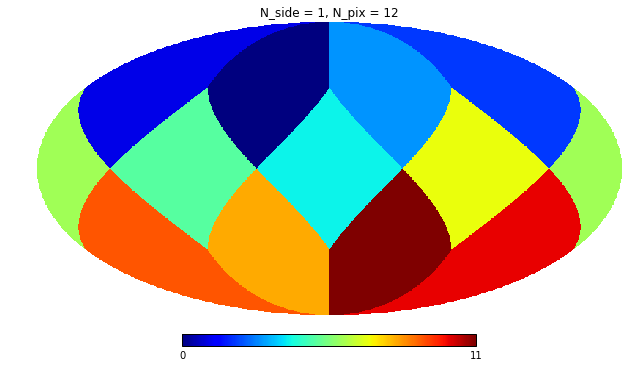

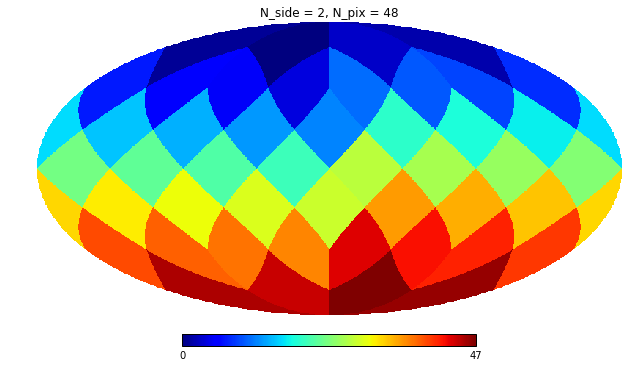

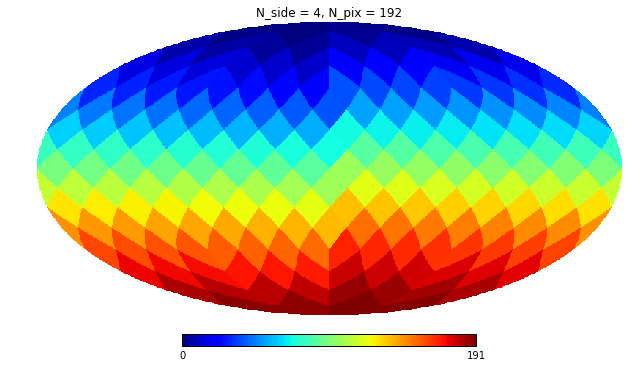

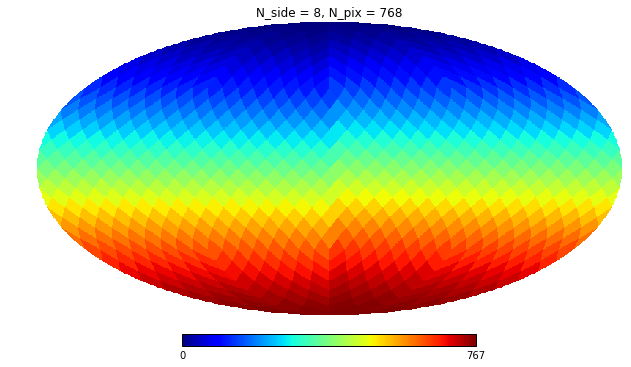

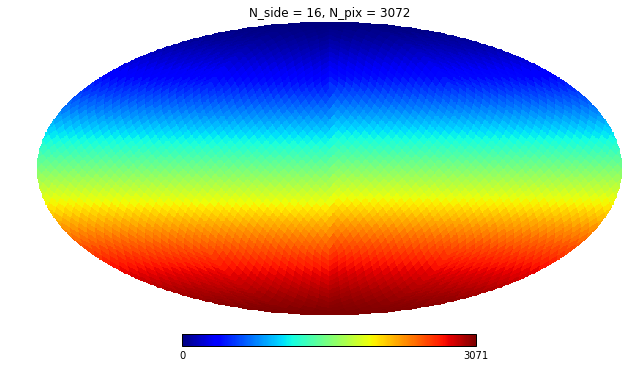

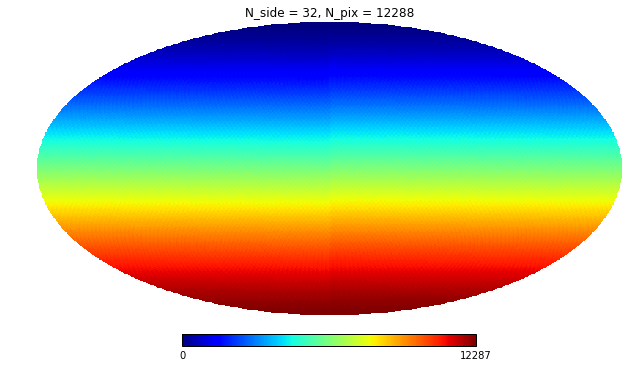

In [3]:
for i in xrange(6):
    npix = hp.nside2npix(2 ** i)
    L = np.arange(npix)
    hp.mollview(L, title = "N_side = {}, N_pix = {}".format(2 ** i, npix))
    plt.show()

# Angles and Pixels

Obviously we need to be able to do more than just plot `np.arange`, but first we need to break away from pixel indices.  If we want to plot some spherical function, the index is not that helpful; fortunately, Healpy will do conversions for us with the following functions (note that relations with pix require nside):

- `ang2pix(nside, theta, phi)`
- `ang2vec(theta, phi)`
- `pix2ang(nside, i)`
- `pix2vec(nside, i)`
- `vec2ang(x, y, z)`
- `vec2pix(nside, x, y, z)`

| Type | Description | Bounds |
| ---- | ----------- | ------ |
| ang | ($\theta$, $\phi$) - tuple of spherical coordinates | $0 \leq \theta < \pi$, $0 \leq \phi < 2 \pi$|
| pix | $i$ - pixel index in array | $0 \leq i < N_{pix}$ |
| vec | ($x, y, z$) - tuple of Cartesian coordinates of unit vector | $0\leq x, y, z \leq 1$, $x^2+y^2+z^2=1$|

Now we can create a map based on a spherical function, $f(\theta, \phi)$.  Note the we also start setting min and max values in the `mollview` function, meaning we manually set the bounds on the chromatic scale.

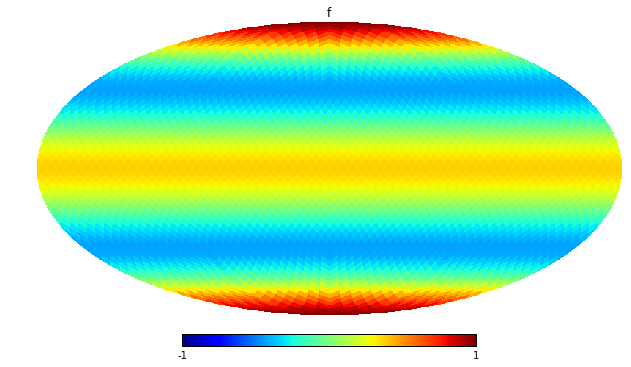

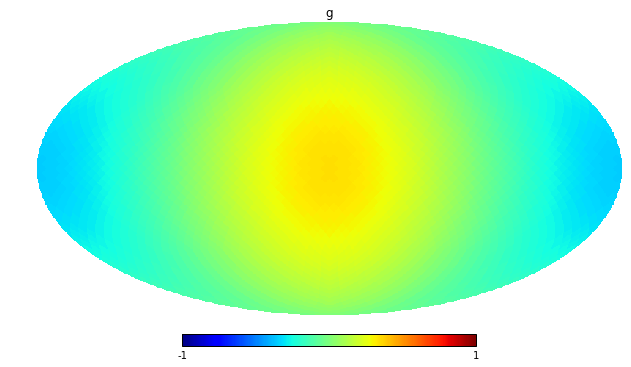

In [4]:
def f(theta, phi):
    # Legendre Polynomial P_4(cos(theta))
    return (35 * np.cos(theta) ** 4 - 30 * np.cos(theta) ** 2 + 3) / 8

nside = 16
npix = hp.nside2npix(nside)
L = np.array([f(*(hp.pix2ang(nside, i))) for i in xrange(npix)])
hp.mollview(L, title="f", min=-1, max=1)
plt.show()

def g(theta, phi):
    # Laplace's Spherical Harmonic Y_(1,1)(theta, phi)
    return 0.5 * np.sqrt(1.5 / np.pi) * np.sin(theta) * np.exp(1j * phi).real

nside = 16
npix = hp.nside2npix(nside)
L = np.array([g(*(hp.pix2ang(nside, i))) for i in xrange(npix)])
hp.mollview(L, title="g", min=-1, max=1)
plt.show()

# Gnomonic Projection

So far we have only been looking at Mollweide projections, which give a broad depicition of trends; however, sometimes we may need to examine smaller areas.  For this, we will use Gnomonic projections through Healpy's `gnomview` function.  This function takes a few new parameters:

| Argument | Description |
| ---- | ----------- | ------ |
| rot | (lat, lon, $\psi$) - Latitude and longitude to center on, rotated about that point by angle $\psi$ - all given in degrees |
| reso | Resolution given as arcminutes (1 arcmin = 1/60 degrees) per pixel.  **NOTE:** pixel here is literally pixels of the output image, not pixels on the sphere.  The image defaults to 200x200 pixels.  This means with reso=6, we see 20x20 degrees.|

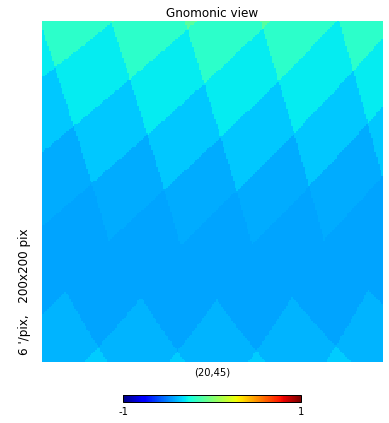

In [5]:
nside = 16
npix = hp.nside2npix(nside)
L = np.array([f(*(hp.pix2ang(nside, i))) for i in xrange(npix)])
hp.gnomview(L, rot=(20, 45, 0), min=-1, max=1, reso=6)
plt.show()

# Downloading Datasets

Now that we know the basics of Healpy, we can look at some real data.
As the files are very large, we will need to download them.

In [6]:
import urllib

files = {
         'http://www.andrew.cmu.edu/user/enumbers/15388tutorial/HFI_SkyMap_857-field-Int_2048_R2.02_full.fits':
          'planck.fits',
         'http://www.andrew.cmu.edu/user/enumbers/15388tutorial/wmap_iqusmap_r4_yr1_K1_v5.fits':
          'wmap.fits',
         'http://www.andrew.cmu.edu/user/enumbers/15388tutorial/wmap_imap_r9_9yr_K1_v5.fits':
          'wmap_full.fits',
        }

for (url, filename) in files.items():
    newfile = urllib.URLopener()
    newfile.retrieve(url, filename)
    print "Saved {} to {}".format(url, filename)

Saved http://www.andrew.cmu.edu/user/enumbers/15388tutorial/wmap_imap_r9_9yr_K1_v5.fits to wmap_full.fits
Saved http://www.andrew.cmu.edu/user/enumbers/15388tutorial/HFI_SkyMap_857-field-Int_2048_R2.02_full.fits to planck.fits
Saved http://www.andrew.cmu.edu/user/enumbers/15388tutorial/wmap_iqusmap_r4_yr1_K1_v5.fits to wmap.fits


| File | Size | $N_{side}$ | Description |
|------|------|------------|-------------|
| planck.fits | 201.3 MB | 2048 | This data is a full sky map over 7 years from the [Planck mission](http://pla.esac.esa.int/pla/), and it shows the intensity of light at 857 GHz (very high frequency) in units of $\text{MJy sr}^{-1}$. |
| wmap.fits | 161 kB | 16 | This is a full sky map from the first year of the [Wilkinson Microwave Anisotropy Probe (WMAP)](https://lambda.gsfc.nasa.gov/product/map/current/m_products.cfm) that shows the Stokes I (temperature) in units of $mK$.  We are using a reduced resolution version.|
| wmap_full.fits | 25.2 MB | 512 | This full resolution data from WMAP (as above) taken over nine year. |

# Loading a Dataset

We can load data with the `read_map` function, so let's explore some data from the Planck mission, which gives us intensity in $\text{MJy sr}^{-1}$ units.

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


No INDXSCHM keyword in header file : assume IMPLICIT


Ordering converted to RING


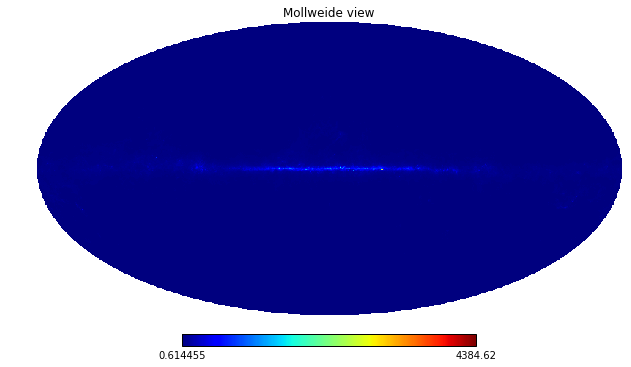

In [7]:
planck_map = hp.read_map('planck.fits')
hp.mollview(planck_map)
plt.show()

Since most of the data lies near the minimum, we need to change the chromatic scale.  Right now it is linear from the minimum to the maximum, but we can make it scale logarithmically or based on a histogram of the data:

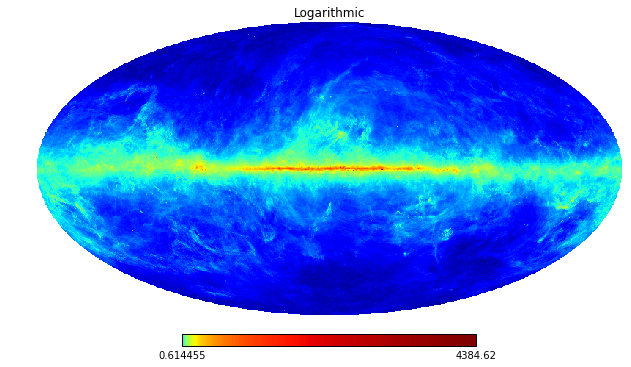

/Users/evannumbers/Library/Python/2.7/lib/python/site-packages/healpy/projaxes.py:808: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[np.isinf(val.data)] = -np.inf


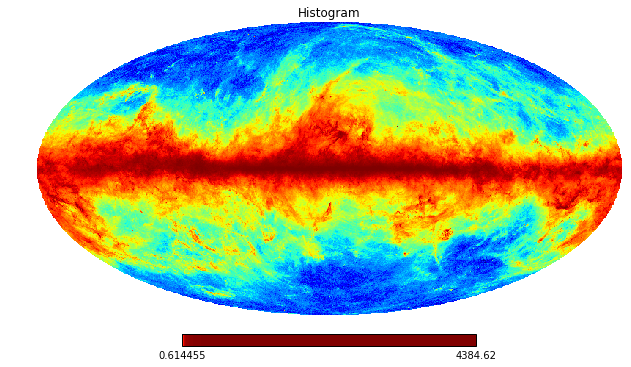

In [8]:
hp.mollview(planck_map, norm='log', title='Logarithmic')
plt.show()

hp.mollview(planck_map, norm='hist', title='Histogram')
plt.show()

# Anisotropies in the CMB

The Cosmic Microwave Background (CMB) is thermal radiation left over from the big bang, and it can be detected across the sky.  If the CMB is isotropic, that means that its value is constant regardless of direction, and we should measure a constant value across the sky.

Anistropies are small fluctuations in the temperature across the sky.  With the spherical harmonics $l,m$, we can represent these fluctations as:

$T(\theta, \phi) = \sum\limits_{l,m}a_{lm}Y_{lm}(\theta, \phi)$

where $Y_{lm}(\theta, \phi)$ is LaPlace's spherical harmonic function.

We call $a_{lm}$ the alm, and $C_l = \langle |a_{lm}|^2 \rangle$, the average of $|a_{lm}|^2$ over $m$, the cl.

# Computing Power Spectrum

We can use Healpy's `anafast` function to compute the power spectrum given a map, given as the cl.
Note that `ell` refers to just $l$.

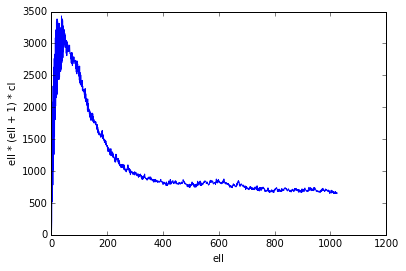

In [9]:
cl = hp.anafast(planck_map, lmax=1024)
ell = np.arange(len(cl))
plt.figure()
plt.plot(ell, ell * (ell+1) * cl)
plt.xlabel('ell')
plt.ylabel('ell * (ell + 1) * cl')
plt.show()

Above we computed $C_l$, which depends only on $l$.  Below we compute $a_{lm}$, which depends on $l$ and $m$.  We create the independent variable array `ellem` which uses the fact that $m \leq l$ and will have the same length as `alm`.

In [10]:
LMMAX = 16
alm = hp.map2alm(planck_map, lmax=LMMAX, mmax=LMMAX)
ellem = [(l, m) for l in xrange(LMMAX+1) for m in xrange(l+1)]

We can plot this data as a 2-D heat map:

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/numeric.py:533: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


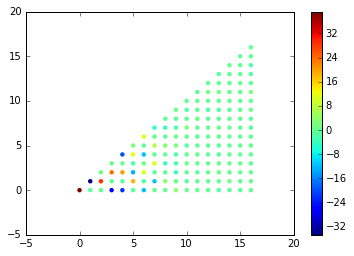

In [11]:
ell, em = zip(*ellem)
plt.scatter(ell, em, marker='o', c=alm, edgecolors='none')
plt.colorbar()
plt.show()

Or we can just print some of the values:

In [12]:
for ((l, m),a) in zip(ellem, alm):
    if l < 5 and m < 5:
        print "a({}, {}) = {}".format(l, m, a)

a(0, 0) = (39.2022129489+0j)
a(1, 0) = (-0.412799444729+0j)
a(1, 1) = (-34.6922305115+0j)
a(2, 0) = (0.204410643117+0j)
a(2, 1) = (29.0951694886+0j)
a(2, 2) = (0.528630169839+0j)
a(3, 0) = (-25.839534152+0j)
a(3, 1) = (-0.807833840166+0j)
a(3, 2) = (23.7549367936+0j)
a(3, 3) = (0.78983314615+0j)
a(4, 0) = (-21.8556319747+0j)
a(4, 1) = (-0.728625642498+0j)
a(4, 2) = (20.2247181025+0j)
a(4, 3) = (0.744043454124+0j)
a(4, 4) = (-19.1202072713+0j)


Instead of saving information for every pixel, we can save just the cl or just the alm, then approximate the map from that. The map is reformed with $T(\theta, \phi) = \sum\limits_{l,m}a_{lm}Y_{lm}(\theta, \phi)$, so we can save space by storing the alm.

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


Overwriting existing file 'alm.fits'.


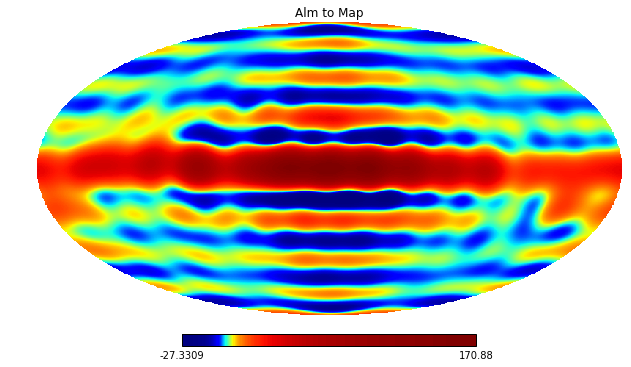

In [13]:
hp.write_alm('alm.fits', alm)
alm = hp.read_alm('alm.fits')

alm_map = hp.alm2map(alm, 2048)
hp.mollview(alm_map, norm='hist', title='Alm to Map')
plt.show()

Clearly this is not an accurate representation of our original map, though youmay see some likeness.  This is because we used alm with limits $l,m \leq 16$, and we have a huge map with $N_{side}=2048$.  Healpy uses a default $l_{max} = m_{max} = 3N_{side}-1$ which is 6143 in our case.  That is huge and would take a very long time, so let's ramp up to just 256.

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


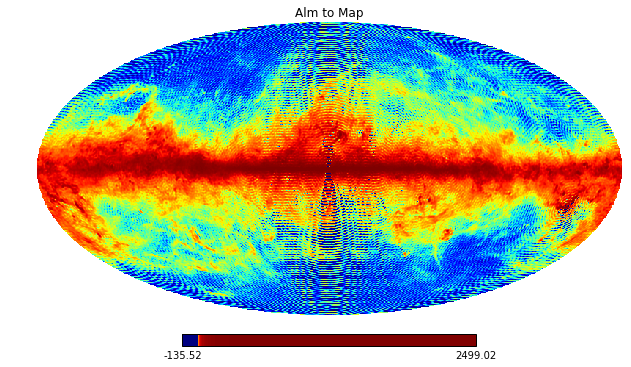

In [14]:
LMMAX = 256
alm = hp.map2alm(planck_map, lmax=LMMAX, mmax=LMMAX)

alm_map = hp.alm2map(alm, 2048)
hp.mollview(alm_map, norm='hist', title='Alm to Map')
plt.show()

This is looking much better, though it still has some artifacts.  Let's look at how quickly we can improve the accuracy by trying this on a few values of $l_{max} = m_{max}$.  We will use the MSE (Mean Squared Error) to judge the accuracy of an alm map.

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


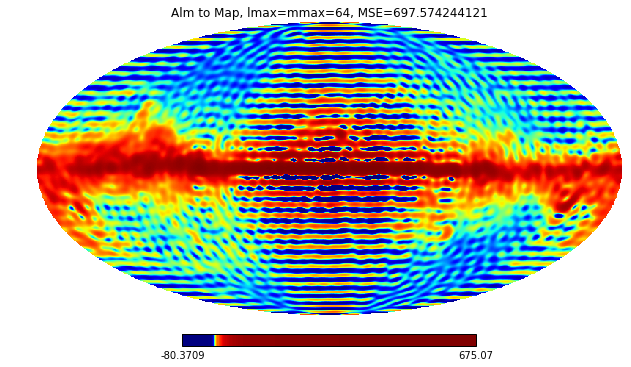

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


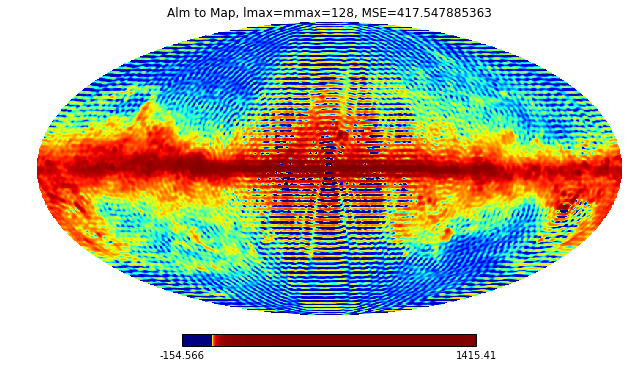

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


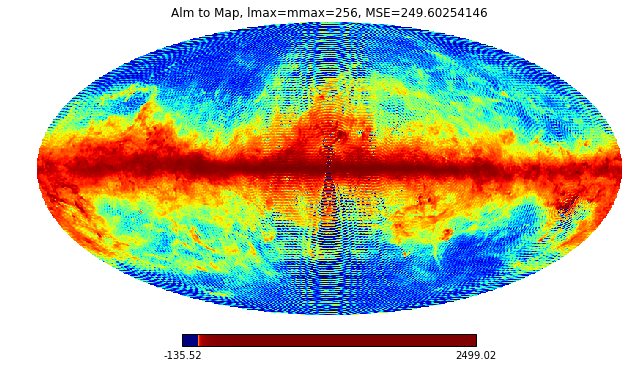

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


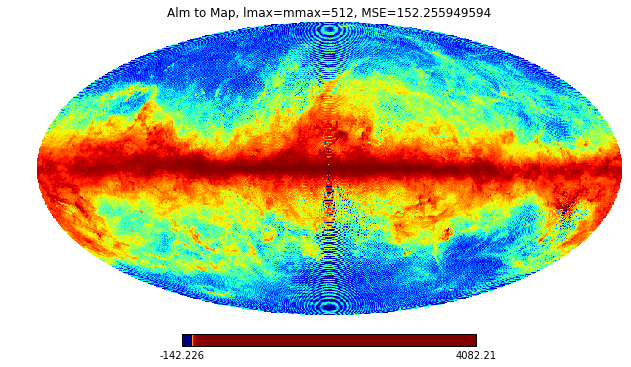

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


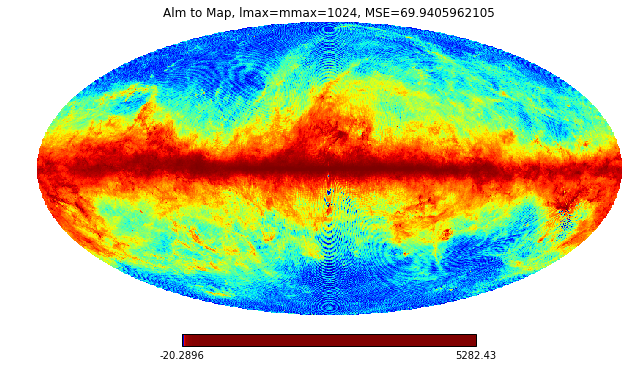

In [15]:
def MSE(map1, map2):
    return np.linalg.norm(map1 - map2) ** 2 * 1.0 / len(map1)

for LMMAX in [64, 128, 256, 512, 1024]:
    alm = hp.map2alm(planck_map, lmax=LMMAX, mmax=LMMAX)

    alm_map = hp.alm2map(alm, 2048)
    err = MSE(alm_map, planck_map)
    hp.mollview(alm_map, norm='hist', title='Alm to Map, lmax=mmax={}, MSE={}'.format(LMMAX, err))
    plt.show()

Note that by the restraints $0 \leq m \leq l$, with $l_{max} = m_{max}$, the alm will have $\frac{(l_{max} + 1)(l_{max}+2)}{2}$ entries.  And remember, $N_{pix} = 12N_{side}^2$.  In this case, the original map had $N_{pix}=50331648$ pixels, but our final alm representation had 525825 entries.  We thus used about 1% of the original space of the map, and it appears to be a decent representation.

If we had used the suggest $l_{max} = 3N_{side}-1$, the fraction of space used compared to a raw map is $\frac{3N_{side}+1}{8N_{side}}$, or approximately 3/8.

# More Data

We can work similarly on the WMAP data.

NSIDE = 16
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


No INDXSCHM keyword in header file : assume IMPLICIT


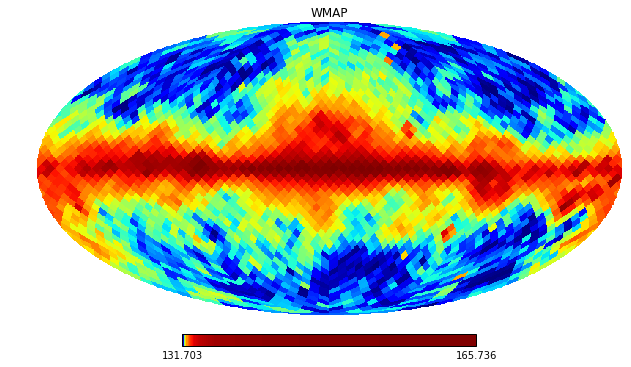

In [16]:
wmap_map = hp.read_map('wmap.fits')
hp.mollview(wmap_map, norm='hist', title='WMAP')
plt.show()

# Smoothing

Notice how grainy the above map is.  We specifically are using a reduced resolution version, but we will use smoothing to make it more presentable.

Smoothing is done with a Gaussian beam of specified full-width-half-maximum (fwhm) in radians.

Sigma is 145.987664 arcmin (0.042466 rad) 
-> fwhm is 343.774677 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


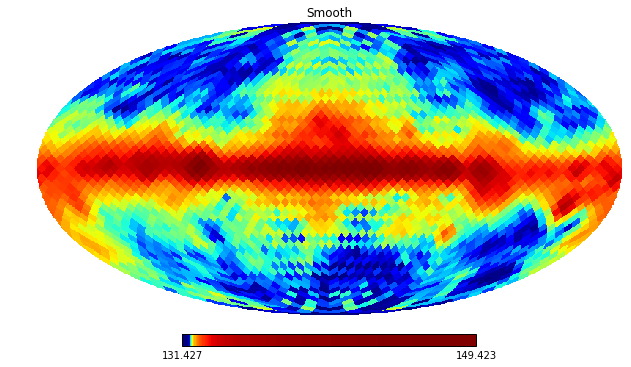

In [17]:
smooth_wmap = hp.smoothing(wmap_map, fwhm=0.1)
hp.mollview(smooth_wmap, norm='hist', title='Smooth')
plt.show()

Notice how the map is smoother and the range of values decreases.  But the map is just as grainy as before!  The problem is both the original and smooth map have the same $N_{side}=16$.  We can create an inflated version of the original map with $N_{side}=128$, then smooth that inflated map.

`ud_grade` takes a map and a desired $N_{side}$ and changes the resolution of the input map.

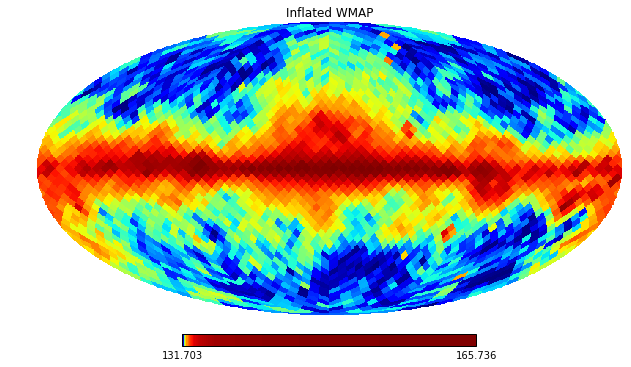

In [18]:
inflated_map = hp.ud_grade(wmap_map, 128)
hp.mollview(inflated_map, norm='hist', title='Inflated WMAP')
plt.show()

Notice how the inflated map looks identical to the original map.  Because increasing $N_{side}$ splits existing pixels, the map will not change appearance by upgrading resolution, it just adds more pixels.  We notice the real difference after smoothing:

Sigma is 145.987664 arcmin (0.042466 rad) 
-> fwhm is 343.774677 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


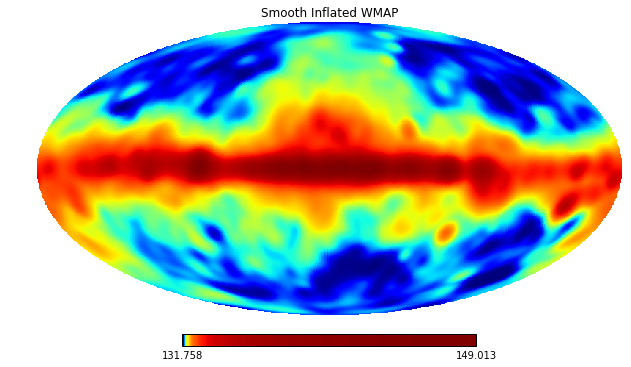

In [19]:
smooth_inflated_map = hp.smoothing(inflated_map, fwhm=0.1)
hp.mollview(smooth_inflated_map, norm='hist', title='Smooth Inflated WMAP')
plt.show()

# Analysis

We've talked a lot about maps, but we can still analyze these maps further.

For example, we can plot a histogram of the temperatures of the full WMAP data:

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


No INDXSCHM keyword in header file : assume IMPLICIT


Ordering converted to RING


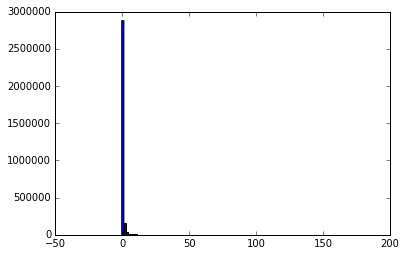

In [20]:
full_wmap = hp.read_map('wmap_full.fits')

plt.hist(full_wmap, bins=100)
plt.show()

At first glance, there is such little data at the high end of the spectrum that we can remove the high end to get a better idea of how the curve looks at the low end.

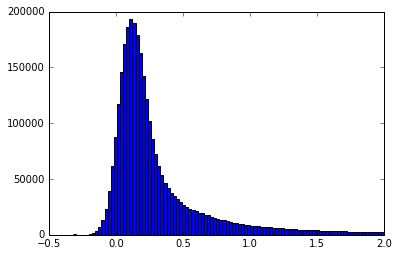

In [21]:
filtered_wmap = [i for i in full_wmap if i < 2]
plt.hist(filtered_wmap, bins=100)
plt.show()